In [664]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [666]:
data=pd.read_csv('dataAssuranceU.csv')

In [668]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [670]:
data.shape

(2781, 7)

In [672]:
data.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [674]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2744 non-null   float64
 1   sex       2743 non-null   object 
 2   bmi       2748 non-null   float64
 3   children  2752 non-null   float64
 4   smoker    2755 non-null   object 
 5   region    2748 non-null   object 
 6   charges   2752 non-null   float64
dtypes: float64(4), object(3)
memory usage: 152.2+ KB


In [676]:
data.describe()

,age,bmi,children,charges
count,2744.000000,2748.000000,2752.000000,2752.000000
mean,39.192784,30.651212,1.090480,13223.606662
std,14.056200,6.104509,1.200459,12045.048983
min,18.000000,15.960000,0.000000,1121.870000
25%,26.000000,26.220000,0.000000,4746.343000
50%,39.000000,30.332500,1.000000,9377.902350
75%,51.000000,34.700000,2.000000,16579.959427
max,64.000000,53.130000,5.000000,63770.430000


In [678]:
#General Conclusion

In [680]:
data.isnull().sum()

age         37
sex         38
bmi         33
children    29
smoker      26
region      33
charges     29
dtype: int64

In [682]:
data.duplicated().sum()

151

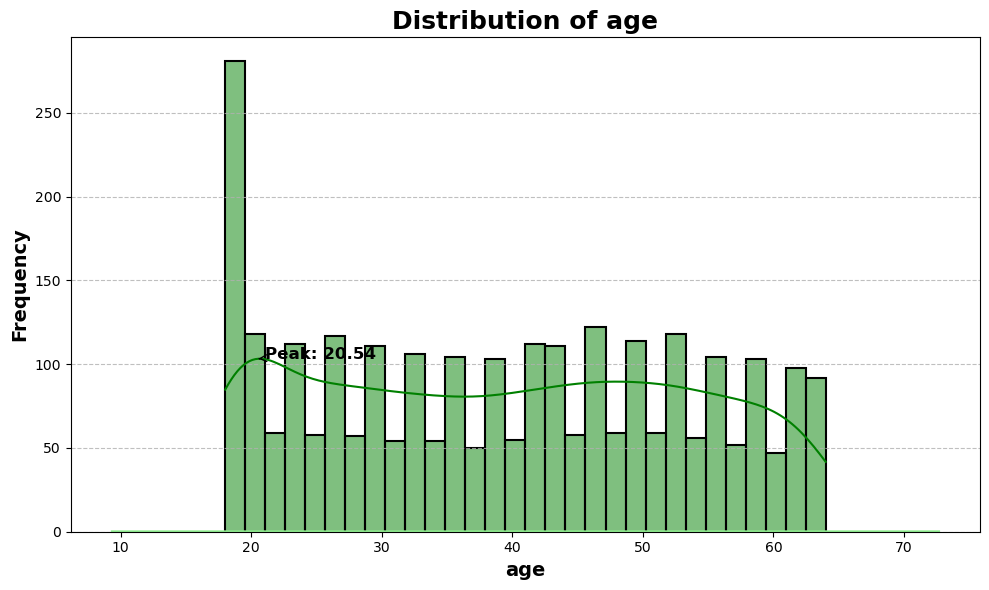

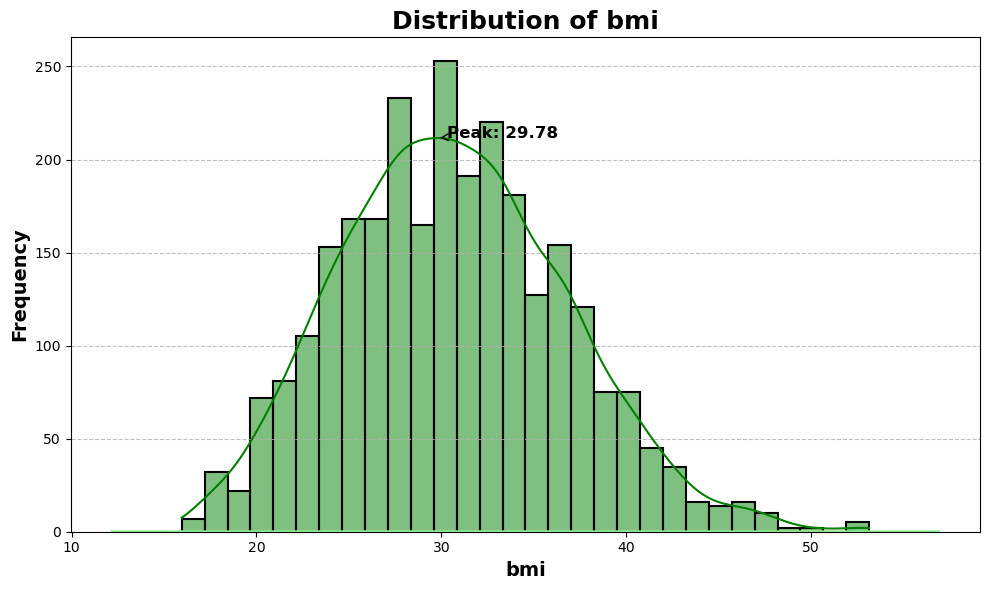

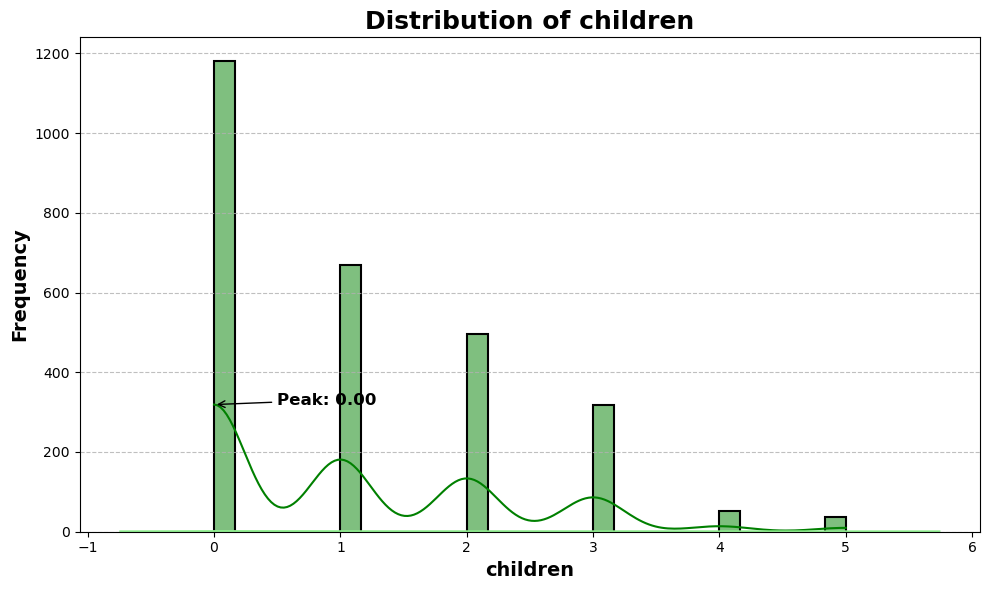

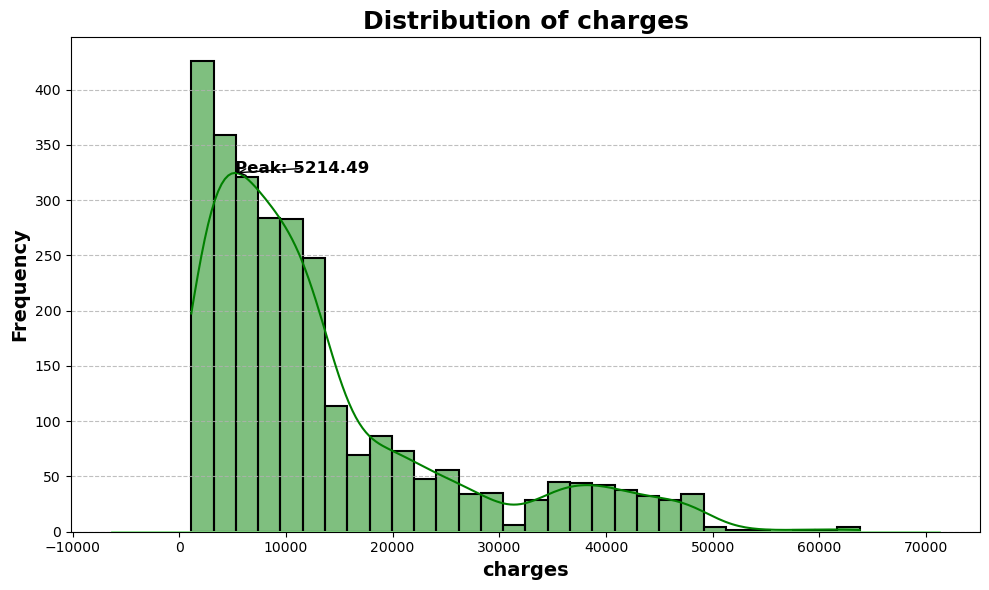

In [684]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Loop over each numerical column and plot separately
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    
    # Create histogram with KDE and pastel pink and green color theme
    sns.histplot(data[col], kde=True, color="green", edgecolor="black", linewidth=1.5, bins=30)
    
    # Add title and axis labels with improved formatting
    plt.title(f'Distribution of {col}', fontsize=18, fontweight='bold', color='black')
    plt.xlabel(col, fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')
    
    # Customize grid and background
    plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.8)
    
    # Add annotations for peak values (max density point in KDE)
    if data[col].notnull().any():  # Ensure the column is not empty
        kde_ax = sns.kdeplot(data[col], color="lightgreen", linewidth=2)
        max_density = kde_ax.lines[0].get_data()[1].max()  # Find max y-value (density)
        max_x = kde_ax.lines[0].get_data()[0][kde_ax.lines[0].get_data()[1].argmax()]  # Corresponding x-value
        plt.annotate(f"Peak: {max_x:.2f}", xy=(max_x, max_density), xytext=(max_x + 0.5, max_density + 0.02),
                     arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color="black", fontweight="bold")
    
    # Adjust layout to avoid clipping
    plt.tight_layout()
    plt.show()

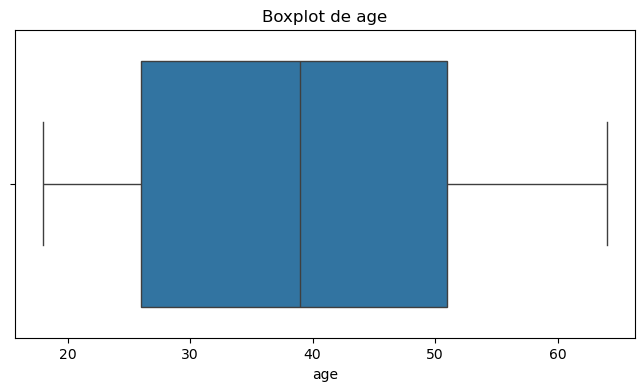

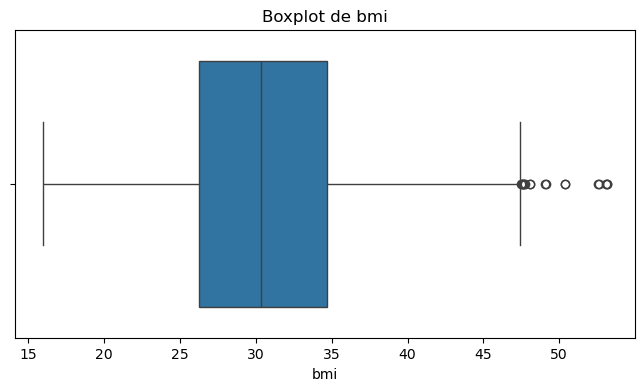

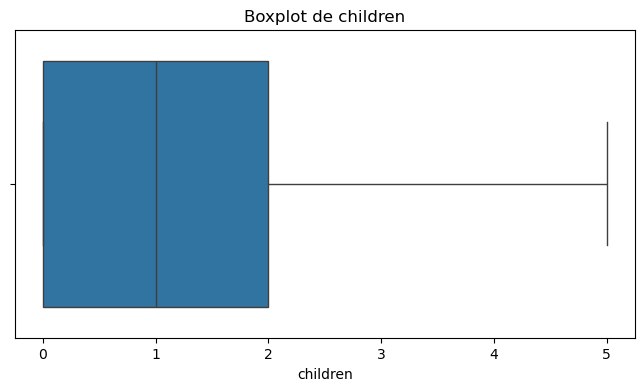

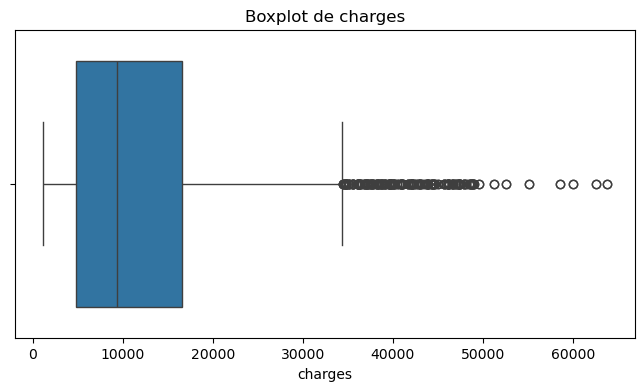

In [685]:
for column in numerical_cols: # Exclure la colonne 'species' 
    plt.figure(figsize=(8, 4)) 
    sns.boxplot(x=data[column]) 
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

In [688]:
for column in numerical_cols:
    # Calcul des quartiles et de l'IQR
    print(column)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les limites des outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détecter les positions des outliers 
    outlier_positions = ((data[column] < lower_bound) | (data[column] > upper_bound))
    print(outlier_positions.sum())

age
0
bmi
17
children
0
charges
284


In [690]:
df=data.copy()

In [692]:
# Exclure certaines colonnes
numerical_cols = [col for col in numerical_cols if col not in ['children', 'age']]
print(df.duplicated().sum())

# Maintenant ton traitement IQR sur les colonnes restantes
for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    outliers = df[(df[column] < low) | (df[column] > high)]
    print(f"{column} - Nombre de valeurs aberrantes AVANT remplacement :", len(outliers))
    
    # Remplacer par la médiane
    median_val = df[column].median()
    df[column] = np.where((df[column] < low) | (df[column] > high), median_val, df[column])
    
    # Vérifier après remplacement
    outliers_after = df[(df[column] < low) | (df[column] > high)]
    print(f"{column} - Nombre de valeurs aberrantes APRÈS remplacement :", len(outliers_after))
print(df.duplicated().sum())



151
bmi - Nombre de valeurs aberrantes AVANT remplacement : 17
bmi - Nombre de valeurs aberrantes APRÈS remplacement : 0
charges - Nombre de valeurs aberrantes AVANT remplacement : 284
charges - Nombre de valeurs aberrantes APRÈS remplacement : 0
183


In [694]:
# Moyenne
df['age'] = df['age'].fillna(df['age'].mean())

In [696]:
df['sex'] = df['sex'].fillna(df['sex'].value_counts().index[0])


In [698]:
df['smoker'] = df['smoker'].fillna(df['smoker'].value_counts().index[0])


In [700]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [702]:
df['children'] = df['children'].fillna(df['children'].mean())

In [704]:
df['region'] = df['region'].fillna(df['region'].value_counts().index[0])

In [706]:
# Moyenne
df['charges'] = df['charges'].fillna(df['charges'].mean())

In [708]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [710]:
# Supprimer les doublons
df = df.drop_duplicates()

In [712]:
df.duplicated().sum()

0

In [715]:
df.shape

(2596, 7)

In [717]:
from sklearn.preprocessing import OneHotEncoder
# Colonnes catégorielles à encoder
categorical_cols = ['sex', 'smoker', 'region']

# Créer l'encodeur OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop=None -> garde toutes les catégories

# Appliquer l'encodage
encoded_data = encoder.fit_transform(df[categorical_cols])

# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_data, 
                          columns=encoder.get_feature_names_out(categorical_cols),
                          index=df.index)

# Supprimer les colonnes originales catégorielles et concaténer les colonnes encodées
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)

# Afficher le résultat final
print(df.head())

    age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0  19.0  27.900       0.0  16884.92400         1.0       0.0        0.0   
1  18.0  33.770       1.0   1725.55230         0.0       1.0        1.0   
2  28.0  33.000       3.0   4449.46200         0.0       1.0        1.0   
3  33.0  22.705       0.0  21984.47061         0.0       1.0        1.0   
4  32.0  28.880       0.0   3866.85520         0.0       1.0        1.0   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0         1.0               0.0               0.0               0.0   
1         0.0               0.0               0.0               1.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               1.0               0.0   
4         0.0               0.0               1.0               0.0   

   region_southwest  
0               1.0  
1               0.0  
2               0.0  
3               0.0  
4           

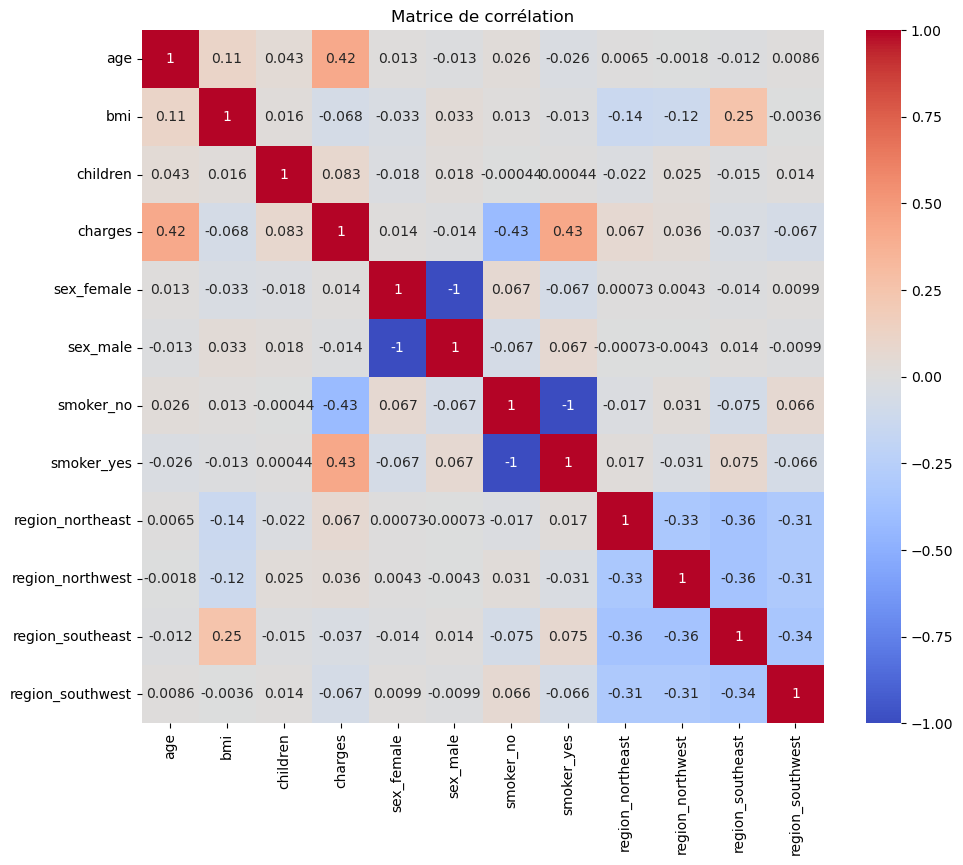

In [719]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


In [721]:
#age ↔ charges (0.46)
#→ L’âge a un effet modéré positif : plus on est âgé, plus les frais médicaux augmentent.

#bmi ↔ charges (0.2)
#→ Le BMI a un effet positif mais faible.

#smoker_yes ↔ charges (0.39)
#→ Être fumeur augmente les charges médicales de façon modérée, mais ce n’est pas la relation la plus forte ici.

#smoker_no ↔ charges (-0.39)
#→ Les non-fumeurs dépensent moins en frais médicaux (logique, symétrique à smoker_yes).

#children, sexe, région ↔ charges (~0.0 à 0.07)
#→ Impact quasi nul.
#Les variables qui influencent le plus les charges sont l’âge (0.46) et le fait d’être fumeur (0.39). Le BMI joue un rôle plus faible (0.2), tandis que les autres variables n’ont quasiment aucun effet.

In [723]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [725]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Séparer features et target
X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) :", mse)
print("R² score :", r2)

Mean Squared Error (MSE) : 7413427.130087462
R² score : 0.83338999401658


In [727]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sélection des features pour le clustering
features = ["smoker_yes", "children"]  # variables discriminantes
X = df[features].copy()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
k = 3  # tu peux ajuster
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

df["Cluster"] = labels

# Ajouter charges pour identifier le cluster à haut risque
summary = df.groupby("Cluster").agg(
    size=("charges","size"),
    avg_charges=("charges","mean"),
    age_mean=("age","mean"),
    bmi_mean=("bmi","mean"),
    smoker_rate=("smoker_yes","mean")
).sort_values("avg_charges", ascending=False)

print("Résumé des clusters (haut risque en premier) :\n", summary)
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.3f}")


Résumé des clusters (haut risque en premier) :
          size   avg_charges   age_mean   bmi_mean  smoker_rate
Cluster                                                       
2         497  15858.154037  38.438487  30.387321     1.000000
1         669   9611.704317  40.000234  30.774340     0.001495
0        1430   7897.479695  39.049280  30.451812     0.000000
Silhouette Score: 0.705
